#Discrete event simulation (BLG443E) Assignment 1 part 1
#Assignee: Mehmet Gencay Ertürk - 150130118
gender() is a Bernoulli distribution function with equal female and male probabilities. 0 output of gender() function is assumed to be male and 1 is assumed to be female.

In [35]:
from random import *
import matplotlib.pyplot as plt
import numpy as np
def gender(): 
    return randrange(2) 

num_female function returns number of females from n samples. This function is called 20 times,the parameter is also 20 and results are shown as a bar chart. This operation generates a binomial distribution. Probablity mass function of binomial distribution tends to give equal or closer female and male numbers.

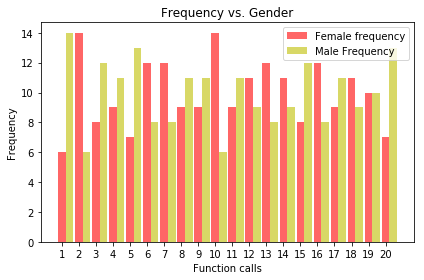

In [21]:
def num_female(n):
    x=0
    for i in range(0,n):
        y=gender()
        if y==1:
            x+=1
    return x
female=list()
male=list()
for i in range(0,20):
    female.append(num_female(20))
    male.append(20-female[i])
index=np.arange(20)
bar_width=0.45
opacity=0.6
error_config={'ecolor':'0.4'}
fig,ax=plt.subplots()
rects1=ax.bar(index,female,bar_width,alpha=opacity,color='r',error_kw=error_config,label='Female frequency')
rects2=ax.bar(index+bar_width,male,bar_width,alpha=opacity, color='y',error_kw=error_config,label='Male Frequency')
ax.set_title('Frequency vs. Gender')
ax.set_xlabel('Function calls')
ax.set_ylabel('Frequency')
ax.set_xticks(index)
ax.set_xticklabels(range(1,21))
ax.legend()
fig.tight_layout()
plt.show()

female_height() and male_height() functions generates height samples for female and male person in Turkey with Gaussian distribution. Functions are called 20 times and results are shown as a histogram with 3 bins.

Text(0, 0.5, 'Frequency')

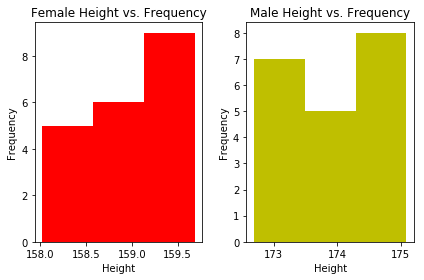

In [36]:
def female_height():
    return gauss(158.9,0.6)
def male_height():
    return gauss(174.1,0.7)
female=list()
male=list()
for i in range(0,20):
    female.append(female_height())
    male.append(male_height())
fig,axs=plt.subplots(1,2,sharey=False,tight_layout=True)
n_bins=3
axs[0].hist(female,bins=n_bins,color='r')
axs[0].set_title("Female Height vs. Frequency")
axs[0].set_xlabel("Height")
axs[0].set_ylabel("Frequency")
axs[1].hist(male,bins=n_bins,color='y')
axs[1].set_title("Male Height vs. Frequency")
axs[1].set_xlabel("Height")
axs[1].set_ylabel("Frequency")

expected_height_by_gender function returns average value n samples, which are taken from previous functions according to gender parameter. This function is called 40 times and results are shown below as a histogram. This is an example of Monte Carlo integration. Output histograms of this function and previous function should be different. It gives closer values to the average. When n is increased, output values are being closer to the average value because expected value of Gaussian distribution is equal to the average value.

Text(0, 0.5, 'Frequency')

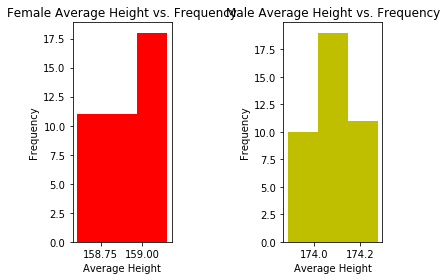

In [33]:
def expected_height_by_gender(gender,n):
    heights=list()
    sum_heights=0
    for i in range(0,n):
        if(gender=="male"):
            heights.append(male_height())
        elif(gender=="female"):
            heights.append(female_height())
        sum_heights+=heights[i]
    return sum_heights/n
average_of_female_heights=list()
average_of_male_heights=list()
for i in range(0,40):
    average_of_female_heights.append(expected_height_by_gender("female",20))
    average_of_male_heights.append(expected_height_by_gender("male",20))
fig,axs=plt.subplots(1,2,tight_layout=True)
n_bins=3
axs[0].hist(average_of_female_heights,n_bins,color='r')
axs[0].set_title("Female Average Height vs. Frequency")
axs[0].set_xlabel("Average Height")
axs[0].set_ylabel("Frequency")
axs[1].hist(average_of_male_heights,n_bins,color='y')
axs[1].set_title("Male Average Height vs. Frequency")
axs[1].set_xlabel("Average Height")
axs[1].set_ylabel("Frequency")

This function produces n samples from a randomly selected gender and return the average value of that. This is Monte Carlo integration of Bernoulli-Gauss joint distribution. As n increases, output values may be get closer to both male average and female average values.

Text(0, 0.5, 'Frequency')

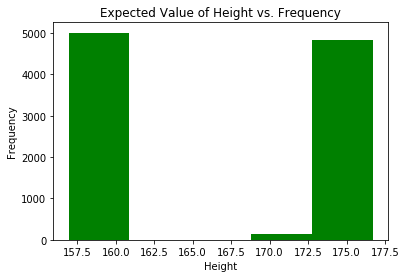

In [25]:
def expected_value(n):
    heights=list()
    sum_values=0
    for i in range(0,n):
        x=gender()
        if(x==1):
            heights.append(female_height())
        elif(x==0):
            heights.append(male_height())
        sum_values+=heights[i]
    return sum_values/n
values=list()
for i in range(0,10000):
    values.append(expected_value(1))
n_bins=5
plt.hist(values,n_bins,color='g')
plt.title("Expected Value of Height vs. Frequency")
plt.xlabel("Height")
plt.ylabel("Frequency")

Brief explanation of the simulation:
Simulation begins with assuming certain number of cabbages kept on stock. This number does not change during the simulation. A clock variable keeps the time. When a customer is come, clock is increased as its interarrival time. Then, cabbages on storage are controlled. If there is a rotten cabbage, it will be reordered. After, if any cabbage is delivered at that time, the person buys that cabbage and a new cabbage is reordered otherwise the customer is refused. Simulation continues until number of people is 1000. Interarrival time of people are uniformly distributed between 0 and 3. Time-to-rot of cabbages are uniformly distributed between 7 and 12. Delivery time of cabbages are uniformly distributed between 1 and 15. This probability functioms are tested and printed out the histogram (20 samples from each). A cabbage is defined as its ordering time. Delivery time is found by adding output of delivery_time() function to its ordering time. Time-to-rot of a cabbage is found by adding output of cabbage_rotten_time() function to its ordering time. In this simulation, a shelf is a list of n cabbages (n is up to 40). When a shelf is constructed, a group of cabbages with order time 0 is created. This cabbages are changed by reordering them. In reordering, order time of a cabbage is equal to simulation clock. There is also exponential version of the simulation. In this version, interarrival time of people exponentially distributed in average value of 1.5 (Average of before). Simulation function saves number of people refused cabbages and number of expired cabbages. Simulation is run from different number (up to 40) of stock cabbages and results are shown on a histogram from each number. Ideal number may be between 15 and 20 for criterias "people refused cabbage should be less than 3 in 1000" and "Number of expired cabbages is minimized.".

In [37]:
def interarrival_time_of_shoppers():
    return uniform(0,3)

Text(0, 0.5, 'Frequency')

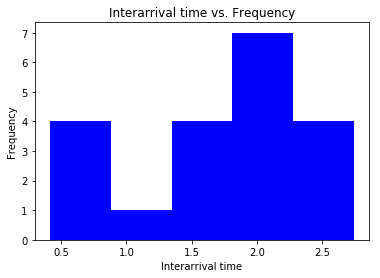

In [38]:
shoppers=list()
for i in range(0,20):
    shoppers.append(interarrival_time_of_shoppers())
n_bins=5
plt.hist(shoppers,n_bins,color='b')
plt.title("Interarrival time vs. Frequency")
plt.xlabel("Interarrival time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

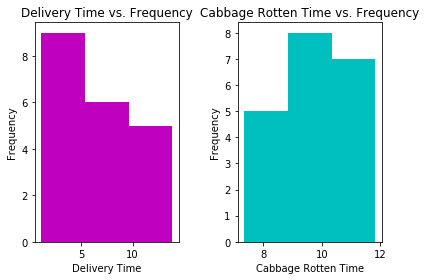

In [39]:
def delivery_time():
    return uniform(1,15)
def cabbage_rotten_time():
    return uniform(7,12)
fig,axs=plt.subplots(1,2,tight_layout=True)
delivery_times=list()
rotten_times=list()
n_bins=3
for i in range(0,20):
    delivery_times.append(delivery_time())
    rotten_times.append(cabbage_rotten_time())
axs[0].hist(delivery_times,n_bins,color='m')
axs[0].set_title("Delivery Time vs. Frequency")
axs[0].set_xlabel("Delivery Time")
axs[0].set_ylabel("Frequency")
axs[1].hist(rotten_times,n_bins,color='c')
axs[1].set_title("Cabbage Rotten Time vs. Frequency")
axs[1].set_xlabel("Cabbage Rotten Time")
axs[1].set_ylabel("Frequency")

In [40]:
class cabbage:
    def __init__(self,a):
        self.order_time=a
        self.arrival_time=a+delivery_time()
        self.rotten_time=a+cabbage_rotten_time()
    def not_arrived(self,t):
        return t<self.arrival_time

In [41]:
class shelf():
    def __init__(self,n):
        if(0<n<=40):
            self.cabbages=list()
            for i in range(0,n):
                self.cabbages.append(cabbage(0))
    def reorder_cabbages(self,i,t):
            self.cabbages.remove(self.cabbages[i])
            self.cabbages.insert(i,cabbage(t))

In [42]:
def expo_arrival_people():
    return expovariate(1/1.5)

In [47]:
def simulation(n):
    s=shelf(n)
    people=0
    clock=0
    expired_cabbages=0
    refused_people=0
    while(people<=1000):
        clock=clock+interarrival_time_of_shoppers()
        people+=1
        for i in range(0,n):
            if(clock>s.cabbages[i].rotten_time):
                expired_cabbages+=1
                s.reorder_cabbages(i,clock)
        i=0
        while(i<n and s.cabbages[i].not_arrived(clock)==True):
            i+=1
        if(i<n):
            s.reorder_cabbages(i,clock)
        else:
            refused_people+=1
    return [expired_cabbages,refused_people]

In [53]:
def expo_simulation(n):
    s=shelf(n)
    people=0
    clock=0
    expired_cabbages=0
    refused_people=0
    while(people<=1000):
        clock=clock+expo_arrival_people()
        people+=1
        for i in range(0,n):
            if(clock>s.cabbages[i].rotten_time):
                expired_cabbages+=1
                s.reorder_cabbages(i,clock)
        i=0
        while(i<n and s.cabbages[i].not_arrived(clock)==True):
            i+=1
        if(i<n):
            s.reorder_cabbages(i,clock)
        else:
            refused_people+=1
    return [expired_cabbages,refused_people]

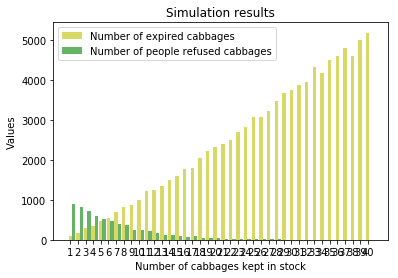

In [54]:
expired_cabbages=list()
refused_people=list()
for stock in range(1,41):
    [x,y]=simulation(stock)
    expired_cabbages.append(x)
    refused_people.append(y)
index=np.arange(stock)
bar_width=0.45
opacity=0.6
error_config={'ecolor':'0.4'}
fig,ax=plt.subplots()
rects1=ax.bar(index,expired_cabbages,bar_width,alpha=opacity,color='y',error_kw=error_config,label='Number of expired cabbages')
rects2=ax.bar(index+bar_width,refused_people,bar_width,alpha=opacity, color='g',error_kw=error_config,label='Number of people refused cabbages')
ax.set_title('Simulation results')
ax.set_xlabel('Number of cabbages kept in stock')
ax.set_ylabel('Values')
ax.set_xticks(index)
ax.set_xticklabels(range(1,stock+1))
ax.legend()
plt.show()

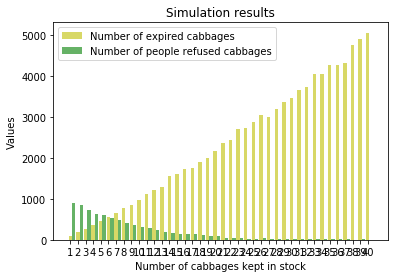

In [55]:
expired_cabbages=list()
refused_people=list()
for stock in range(1,41):
    [x,y]=expo_simulation(stock)
    expired_cabbages.append(x)
    refused_people.append(y)
index=np.arange(stock)
bar_width=0.45
opacity=0.6
error_config={'ecolor':'0.4'}
fig,ax=plt.subplots()
rects1=ax.bar(index,expired_cabbages,bar_width,alpha=opacity,color='y',error_kw=error_config,label='Number of expired cabbages')
rects2=ax.bar(index+bar_width,refused_people,bar_width,alpha=opacity, color='g',error_kw=error_config,label='Number of people refused cabbages')
ax.set_title('Simulation results')
ax.set_xlabel('Number of cabbages kept in stock')
ax.set_ylabel('Values')
ax.set_xticks(index)
ax.set_xticklabels(range(1,stock+1))
ax.legend()
plt.show()